# Forecasting Bike Renting Project
The project has been prepared by Aliaksandr Varonin

Welcome to my project of forecasting bike renting! Our goal throughout this process is to try predicting the total number of bikes people rented in a given hour. In order to achieve it we will create several separate machine learning models and evaluate their perfomance!

The datased that is used in this project is prepared by Hadi Fanaee-T at the University of Porto. It was compiled into a CSV file which we will be using thoughout our research work. The file contains 17380 rows with each row representing the number of bike rentals for a single hour of a single day.

Let me present you the first five rows of the dataset and the description of relevant columns of the dataset.

In [1]:
import pandas as pd
import numpy as np

np.random.seed(7)

data = pd.read_csv("bike_rental_hour.csv")
data = data.reindex(np.random.permutation(data.index))
data = data.reset_index()

print(data.head(5))
print("\n")
print("The length of the dataset is {} rows".format(len(data)))

   index  instant      dteday  season  yr  mnth  hr  holiday  weekday  \
0   3230     3231  2011-05-19       2   0     5  12        0        4   
1  15161    15162  2012-09-28       4   1     9  22        0        5   
2   3812     3813  2011-06-12       2   0     6  18        0        0   
3   1543     1544  2011-03-09       1   0     3  16        0        3   
4  14019    14020  2012-08-12       3   1     8   8        0        0   

   workingday  weathersit  temp   atemp   hum  windspeed  casual  registered  \
0           1           2  0.58  0.5455  0.78     0.1045      38         130   
1           1           2  0.58  0.5455  0.53     0.2239      30         190   
2           0           1  0.70  0.6667  0.74     0.1642      69         187   
3           1           2  0.34  0.3030  0.76     0.3284      10         102   
4           0           1  0.66  0.6212  0.54     0.2239      35          84   

   cnt  
0  168  
1  220  
2  256  
3  112  
4  119  


The length of the datase

** Please, review the description of the relevant columns of the dataset.**

1. instant - A unique sequential ID number for each row;
2. dteday - The date of the rentals;
3. season - The season in which the rentals occurred;
4. yr - The year the rentals occurred;
5. mnth - The month the rentals occurred;
6. hr - The hour the rentals occurred;
7. holiday - Whether or not the day was a holiday;
8. weekday - The day of the week (as a number, 0 to 7);
9. workingday - Whether or not the day was a working day;
10. weathersit - The weather (as a categorical variable);
11. temp - The temperature, on a 0-1 scale;
12. atemp - The adjusted temperature;
13. hum - The humidity, on a 0-1 scale;
14. windspeed - The wind speed, on a 0-1 scale;
15. casual - The number of casual riders (people who hadn't previously signed up with the bike sharing program);
17. registered - The number of registered riders (people who had already signed up);
18. cnt - The total number of bike rentals (casual + registered).

**Then, let's make a histogram of our target column ('cnt') of our dataset in order to look at the distribution of total rentals per hour.**

(array([6972., 3705., 2659., 1660.,  987.,  663.,  369.,  188.,  139.,
          37.]),
 array([  1. ,  98.6, 196.2, 293.8, 391.4, 489. , 586.6, 684.2, 781.8,
        879.4, 977. ]),
 <a list of 10 Patch objects>)

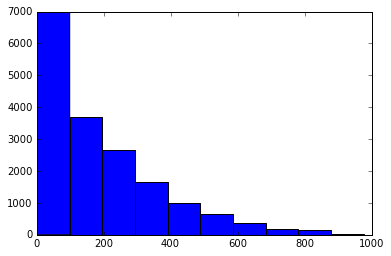

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.hist(data['cnt'])

Here you may observe that a huge part of our values of the "cnt" range between 0 and 100. We see that these values have a descending order.

**At last, we'll try to find correlation patterns of our target column between the others by using "corr" method.**

In [3]:
print(data.corr()['cnt'])

index         0.278379
instant       0.278379
season        0.178056
yr            0.250495
mnth          0.120638
hr            0.394071
holiday      -0.030927
weekday       0.026900
workingday    0.030284
weathersit   -0.142426
temp          0.404772
atemp         0.400929
hum          -0.322911
windspeed     0.093234
casual        0.694564
registered    0.972151
cnt           1.000000
Name: cnt, dtype: float64


Before we proceed to create a machine larning model, we need to analyse our data to see if it should be optimized and improved. For example 'hr' column contains the hours during which bikes are rented, from 1 to 24. A machine will treat each hour differently without understanding that certain hours are related. We can bring some order into the process by creating a new column with labels for 'morning', 'afternoon', 'evening', 'night'. This will bundle similar times together, enabling the model to make better decisions.

In [4]:
def assigning(hours):
    if hours >= 6 and hours < 12:
        return 1
    elif hours >= 12 and hours < 18:
        return 2
    elif hours >= 18 and hours <= 24:
        return 3
    elif hours >= 0 and hours < 6:
        return 4
    
data['time_label'] = data['hr'].apply(assigning)

**Our next step** would be dividing the dataset into train and test parts.
This will improve machine learning perfomance and prevent it from overfitting.

In [5]:
import math

train = data.loc[0:(math.floor(len(data) * 0.8))]
test = data.loc[(len(train)):]

print(len(train))
print(len(test))
print(len(train) + len(test) == len(data))

13904
3475
True


We are now going to start **build our machine larning model.** Let's get started with a linear regression model. Linear regression works best when predictors are linearly correlated to the target and also independent. One of the advantages of linear regression is that it's fairly resistant to overfitting because it's straightforward. It can also be prone to underfitting the data, however, and not building a powerful model. This means that linear regression usually isn't the most accurate option.

Before start, we should check if we need to restrict the features. We will ignore the 'casual' and 'registered' columns because 'cnt' is derived from them. If we're trying to predict the number of people who rent bikes in a given hour ('cnt'), it doesn't make sense that we would already know 'casual' or 'registered' because those numbers are added together to get 'cnt'.

In [6]:
features = [col for col in data.columns if col not in ['cnt', 'casual', 'dteday', 'registered']]
print(features)

target = 'cnt'
print("\n")
print("The mean value of the target column is {}".format(np.mean(data['cnt'])))
print("The standard deviation of the target column is {}".format(data['cnt'].std()))

['index', 'instant', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'time_label']


The mean value of the target column is 189.46308763450142
The standard deviation of the target column is 181.38759909186476


In [7]:
import numpy
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(train[features], train[target])
predictions = model.predict(test[features])

mse = mean_squared_error(test[target], predictions)
print(mse)

16723.875309620715


From the resulting mse we may conclude, that it's quite high. One of the main possible reasons is that the data has a few extremely high rental counts but otherwise mostly low counts. Larger errors are penalized more with MSE, which leads to a higher total error.

We should include **another machine learning model in our research.** It would be a **decision tree algorithm.** Decision trees tend to predict outcomes much more reliable that linear regression models. Because a decision tree is a fairly complex model, it also tends to overfit, particularly when we don't tweak parameters, for example, maximum depth and minumum number of samples per leaf. Decision trees are also prone to instability - small changes in the input data can result in a very different output model.

In [8]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(min_samples_leaf=5, max_depth = 15, min_samples_split=2)
model.fit(train[features], train[target])
predictions = model.predict(test[features])

mse = mean_squared_error(test[target], predictions)
print(mse)

2889.378463726884


This is far better result on even 13.8 thousand points. Now let's tweak some parameters of the model, for example, 'min_samples_leaf', also an optimal parameter 'max_depth' would be set.

In [9]:
i=5

while i > 0:
    
    model = DecisionTreeRegressor(min_samples_leaf=i, max_depth=15, min_samples_split=2)
    model.fit(train[features], train[target])
    predictions = model.predict(test[features])
    
    mse = mean_squared_error(test[target], predictions)
    print(mse)
    i -= 1

2883.748843874784
2869.9148833553472
2966.8437753949856
2938.1432269878756
3342.087344296064


Tweaking 'min_samples_leaf' parameter led to decrease in mse on around 20 points with a min_samples_leaf equaling 4.

Let's move to **another machine learning model applicable to our research project.**

This is **random forest algorithm** that improves on the decision tree algorithm. Random forests tend to be much more accurate that simple models like linear regression. Due to the way random forests are construcred, they tend to overfit much less that decision trees. Random forests can still be prone to overfitting, though, so it's important to tune parameters like maximum depth and minimum samples per leaf.

Let's do the research!

In [10]:
from sklearn.ensemble import RandomForestRegressor

i=5

while i > 0:
    
    model = RandomForestRegressor(n_estimators=500, min_samples_leaf=i, min_samples_split=3)
    model.fit(train[features], train[target])
    predictions = model.predict(test[features])
    
    mse = mean_squared_error(test[target], predictions)
    print(mse)
    i -= 1

1909.8704148006054
1853.959156730935
1800.294998029098
1751.9782810957204
1736.1689004516388


Using random forest allowed us to achieve the lowest mse thoughout this research project. Also we've set the most appropriate parameters to minimize the mse. 

Our MSE is 1736, which is far not perfect value. There's no hard and fast rule about what a "good" error rate is, because it depends on the problem we're solving and our error tolerance.

In this case, the mean value of our target column is 189.5, and the standard deviation is 181. If we take the square root of our MSE to calculate error in terms of bike rentals, we get 41.7. This means that our average error is 41.7 rentals away from the true value. This is lower than the standard deviation, so our predictions are often accurate.